In [59]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
from numpy import cov
from scipy.stats import linregress
from scipy.stats import pearsonr

# Wyoming

In [2]:
# Files to open
wyoming_overdose = pd.read_csv("csv_series/overdose_Wyoming.csv")
wyoming_unemployment = pd.read_csv("csv_series/unemployment_states50.csv")
wyoming_earnings = pd.read_csv("csv_series/earnings_states50.csv")


In [3]:
wyoming_overdose.head()
wyoming_overdose = wyoming_overdose.sort_values(["Year"], ascending=False)
wyoming_overdose.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
7,Wyoming,2015,16.4,NaN,7.9,NaN,-0.15,NaN,-0.15,NaN
4,Wyoming,2014,19.4,NaN,9.3,NaN,0.13,NaN,0.08,NaN
1,Wyoming,2013,17.2,NaN,8.6,NaN,0.02,NaN,0.12,NaN
5,Wyoming,2012,16.8,NaN,7.7,NaN,0.11,NaN,0.03,NaN
16,Wyoming,2011,15.2,NaN,7.5,NaN,0.01,NaN,-0.12,NaN


In [4]:
wyoming_unemployment.head()

,state_id,year,unemployment_rate
0,50,2018,4.1
1,50,2017,4.1
2,50,2016,4.8
3,50,2015,4.9
4,50,2014,3.9


In [5]:
wyoming_earnings.head()

,state_id,year,earnings,pct_change
0,50,2018,207335,1.7
1,50,2017,203816,-0.6
2,50,2016,205040,-5.1
3,50,2015,215998,-1.0
4,50,2014,218127,2.2


In [6]:
combined_unemp_earn = pd.merge(wyoming_unemployment, wyoming_earnings, how="outer", on=['year'])
combined_unemp_earn.head()

,state_id_x,year,unemployment_rate,state_id_y,earnings,pct_change
0,50,2018,4.1,50.0,207335.0,1.7
1,50,2017,4.1,50.0,203816.0,-0.6
2,50,2016,4.8,50.0,205040.0,-5.1
3,50,2015,4.9,50.0,215998.0,-1.0
4,50,2014,3.9,50.0,218127.0,2.2


In [7]:
clean_unemp_earn = combined_unemp_earn[['state_id_x', 'year', 'unemployment_rate', 'earnings', 'pct_change']]
clean_unemp_earn = clean_unemp_earn.rename(columns={"state_id_x":"state", 'year': 'Year'})
clean_unemp_earn.head()

,state,Year,unemployment_rate,earnings,pct_change
0,50,2018,4.1,207335.0,1.7
1,50,2017,4.1,203816.0,-0.6
2,50,2016,4.8,205040.0,-5.1
3,50,2015,4.9,215998.0,-1.0
4,50,2014,3.9,218127.0,2.2


In [11]:
wyoming_combined = pd.merge(clean_unemp_earn, wyoming_overdose, how="outer", on=['Year'])
wyoming_combined_df = wyoming_combined[['Location','Year','unemployment_rate', 'earnings', 'pct_change', 
                                        'All Drug Overdose Death Rate (Age-Adjusted)', 
                                        'Opioid Overdose Death Rate (Age-Adjusted)',
                                        'Percent Change in All Drug Overdose Death Rate from Prior Year', 
                                        'Percent Change in Opioid Overdose Death Rate from Prior Year']]
wyoming_combined_df


,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
3,Wyoming,2015,4.9,215998.0,-1.0,16.4,7.9,-0.15,-0.15
4,Wyoming,2014,3.9,218127.0,2.2,19.4,9.3,0.13,0.08
5,Wyoming,2013,4.5,213355.0,0.5,17.2,8.6,0.02,0.12
6,Wyoming,2012,5.1,212192.0,1.6,16.8,7.7,0.11,0.03
7,Wyoming,2011,5.6,208892.0,1.8,15.2,7.5,0.01,-0.12
8,Wyoming,2010,6.2,205226.0,-2.1,15.0,8.5,0.36,0.49
9,Wyoming,2009,7.1,209729.0,-6.2,11.0,5.7,-0.21,-0.25
10,Wyoming,2008,3.9,223575.0,3.1,14.0,7.6,0.14,0.65


In [13]:
wyoming_combined_sort = wyoming_combined_df.sort_values(['Year'], ascending=True)
wyoming_combined_sort.reset_index(drop=True, inplace=True)
wyoming_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,Wyoming,1999,NaN,NaN,NaN,4.1,NaN,NaN,NaN
1,Wyoming,2000,3.8,NaN,NaN,4.6,NaN,0.12,NaN
2,Wyoming,2001,3.8,NaN,NaN,4.5,NaN,-0.02,NaN
3,Wyoming,2002,4.3,182026.0,0.7,6.9,NaN,0.53,NaN
4,Wyoming,2003,4.1,183403.0,0.8,5.9,NaN,-0.14,NaN


In [21]:
wyoming_combined_sort['earnings_index'] = (wyoming_combined_sort['earnings']/wyoming_combined_sort.loc[3,'earnings'])*100
wyoming_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
9,Wyoming,2008,3.9,223575.0,3.1,14.0,7.6,0.14,0.65,122.825860
10,Wyoming,2009,7.1,209729.0,-6.2,11.0,5.7,-0.21,-0.25,115.219254
11,Wyoming,2010,6.2,205226.0,-2.1,15.0,8.5,0.36,0.49,112.745432
12,Wyoming,2011,5.6,208892.0,1.8,15.2,7.5,0.01,-0.12,114.759430
13,Wyoming,2012,5.1,212192.0,1.6,16.8,7.7,0.11,0.03,116.572358
14,Wyoming,2013,4.5,213355.0,0.5,17.2,8.6,0.02,0.12,117.211278
15,Wyoming,2014,3.9,218127.0,2.2,19.4,9.3,0.13,0.08,119.832881
16,Wyoming,2015,4.9,215998.0,-1.0,16.4,7.9,-0.15,-0.15,118.663268


In [24]:
wyoming_combined_final = wyoming_combined_sort.dropna()
wyoming_combined_final

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
9,Wyoming,2008,3.9,223575.0,3.1,14.0,7.6,0.14,0.65,122.825860
10,Wyoming,2009,7.1,209729.0,-6.2,11.0,5.7,-0.21,-0.25,115.219254
11,Wyoming,2010,6.2,205226.0,-2.1,15.0,8.5,0.36,0.49,112.745432
12,Wyoming,2011,5.6,208892.0,1.8,15.2,7.5,0.01,-0.12,114.759430
13,Wyoming,2012,5.1,212192.0,1.6,16.8,7.7,0.11,0.03,116.572358
14,Wyoming,2013,4.5,213355.0,0.5,17.2,8.6,0.02,0.12,117.211278
15,Wyoming,2014,3.9,218127.0,2.2,19.4,9.3,0.13,0.08,119.832881
16,Wyoming,2015,4.9,215998.0,-1.0,16.4,7.9,-0.15,-0.15,118.663268


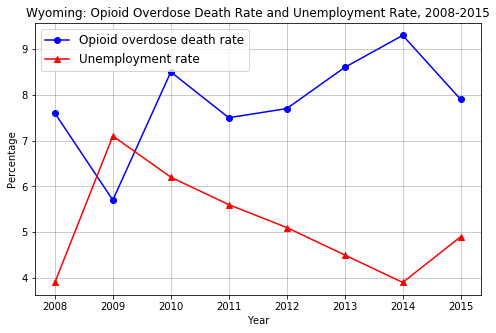

In [56]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = wyoming_combined_final['Year']

# Plot both of these lines so that they will appear on our final chart
overdose_handle, = plt.plot(x_axis, wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
                            color='blue', label='Opioid overdose death rate')
unemployment_handle, = plt.plot(x_axis, wyoming_combined_final['unemployment_rate'], marker='^', 
                                color='red', label="Unemployment rate")
# earnings_handle, = plt.plot(x_axis, wyoming_combined_final['earnings_index'], marker='+', 
#                                 color='green', label="Earnings index (2002=100)")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Wyoming: Opioid Overdose Death Rate and Unemployment Rate, 2008-2015")
plt.xlabel("Year")
plt.ylabel("Percentage")
 
plt.savefig("images/Wyoming_overdose_unemployment.png")
plt.show()


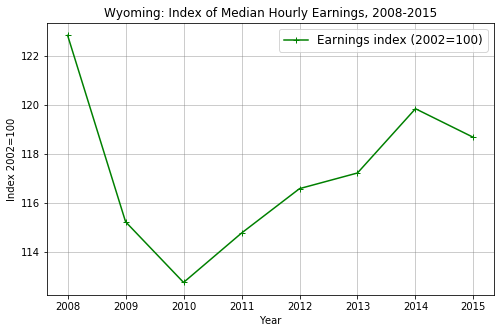

In [57]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = wyoming_combined_final['Year']

# Plot both of these lines so that they will appear on our final chart
# overdose_handle, = plt.plot(x_axis, wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
#                             color='blue', label='Opioid overdose death rate')
# unemployment_handle, = plt.plot(x_axis, wyoming_combined_final['unemployment_rate'], marker='^', 
#                                 color='red', label="Unemployment rate")
earnings_handle, = plt.plot(x_axis, wyoming_combined_final['earnings_index'], marker='+', 
                                 color='green', label="Earnings index (2002=100)")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Wyoming: Index of Median Hourly Earnings, 2008-2015")
plt.xlabel("Year")
plt.ylabel("Index 2002=100")
 
plt.savefig("images/Wyoming_earnings_index.png")
plt.show()

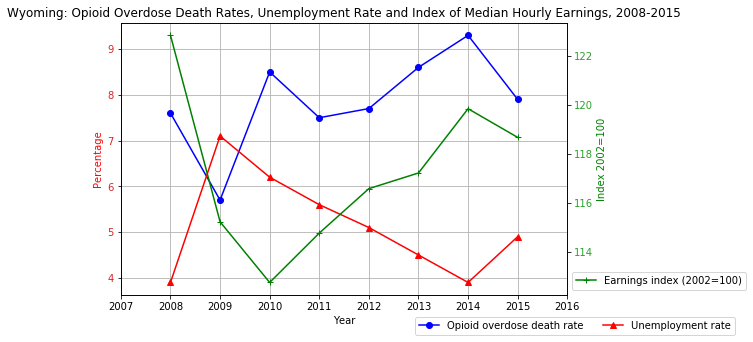

In [46]:
#create twin plots to show timeseries 
# fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_xlim([2007, 2016])
ax1.set_ylabel('Percentage', color='red')

overdose_handle, = ax1.plot(x_axis, wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
                            color='blue', label='Opioid overdose death rate')
unemployment_handle, = ax1.plot(x_axis, wyoming_combined_final['unemployment_rate'], marker='^', 
                                color='red', label="Unemployment rate")


# ax1.plot(graph_data['Year'], graph_data['Opioid Overdose Death Rate (Age-Adjusted)'], color='red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Index 2002=100', color='green') 

earnings_handle, = ax2.plot(x_axis, wyoming_combined_final['earnings_index'], marker='+', 
                                color='green', label="Earnings index (2002=100)")

# ax2.scatter(graph_data['Year'], graph_data['Prescriptions Dispensed (millions)'], color='blue')
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y')
ax1.grid(axis='x')

#ax.legend(bbox_to_anchor=(1.04,1), loc="lower left")

# fig.tight_layout()  
plt.title("Wyoming: Opioid Overdose Death Rates, Unemployment Rate and Index of Median Hourly Earnings, 2008-2015")
ax1.legend(bbox_to_anchor=(1.2,0), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)
ax2.legend(bbox_to_anchor=(1,0), loc="lower left")
plt.show()


In [25]:
avg_unemp = wyoming_combined_df['unemployment_rate'].mean()
avg_opioid_deathrate = wyoming_combined_df['Opioid Overdose Death Rate (Age-Adjusted)'].mean()
print(avg_unemp,avg_opioid_deathrate)

4.3736842105263145 7.48888888888889


# Correlation between overdose and unemployment

In [60]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(wyoming_combined_final['unemployment_rate'],
                                                        wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * wyoming_combined_final['unemployment_rate'] + intercept

In [61]:
corr, _ = pearsonr(wyoming_combined_final['unemployment_rate'], wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.681


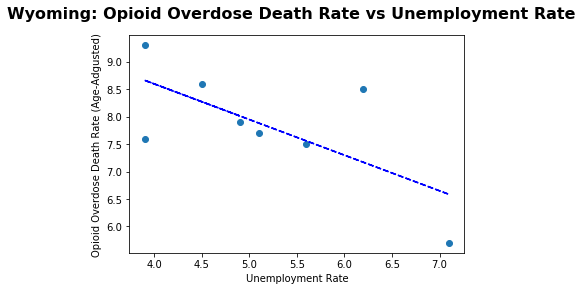

In [62]:
fig, ax = plt.subplots()

fig.suptitle("Wyoming: Opioid Overdose Death Rate vs Unemployment Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(wyoming_combined_final['unemployment_rate'], 
        wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(wyoming_combined_final['unemployment_rate'], fit, 'b--')

plt.savefig("images/wyoming_corr_overdose_unemployment.png")
plt.show()

# Correlation between overdose and earnings

In [63]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(wyoming_combined_final['earnings_index'],
                                                        wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * wyoming_combined_final['earnings_index'] + intercept

In [64]:
corr, _ = pearsonr(wyoming_combined_final['earnings_index'], wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.203


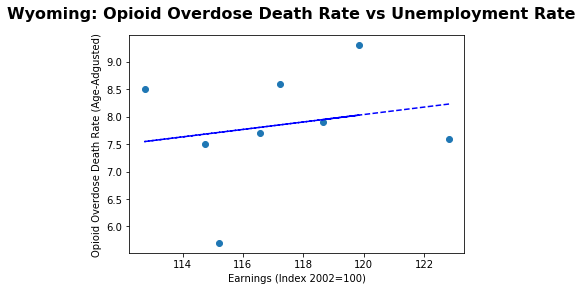

In [65]:
fig, ax = plt.subplots()

fig.suptitle("Wyoming: Opioid Overdose Death Rate vs Unemployment Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Earnings (Index 2002=100)")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(wyoming_combined_final['earnings_index'], 
        wyoming_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(wyoming_combined_final['earnings_index'], fit, 'b--')

plt.savefig("images/wyoming_corr_overdose_earnings.png")
plt.show()